In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import csv

In [ ]:
data = '/content/drive/MyDrive/final_asan1_1.csv'
input_1=[]
output=[]


In [ ]:
benefits = []
with open(data,'r') as file:
    reader = csv.reader(file)
    print(reader)
    for row in reader:
        benefits.append(row[3])
print(benefits)

['Benefits', 'This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.', 'This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.', 'This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high

In [ ]:
import re
new_data = []
for i in range (len(benefits)):
    line = benefits[i]
    line = line.lower()
    line = re.sub(r'[^A-Za-z\n]+', ' ', line)
    line = remove_stopwords(line)
    input_1.append(line)

In [ ]:
input_1

['benefits',
 'group asanas concerned loosening joints body excellent debilitated rheumatism arthritis high blood pressure heart problems ail ments vigorous physical exercise advised particularly useful eliminating energy blockages joints physical body improving coordination self awareness self confidence',
 'group asanas concerned loosening joints body excellent debilitated rheumatism arthritis high blood pressure heart problems ail ments vigorous physical exercise advised particularly useful eliminating energy blockages joints physical body improving coordination self awareness self confidence',
 'group asanas concerned loosening joints body excellent debilitated rheumatism arthritis high blood pressure heart problems ail ments vigorous physical exercise advised particularly useful eliminating energy blockages joints physical body improving coordination self awareness self confidence',
 'foot calf asanas help returning stagnant lymph venous blood relieve tiredness cramp help prevent 

In [ ]:
import pandas as pd
asanas = pd.read_csv('/content/drive/MyDrive/final_asan1_1.csv')
asanas = asanas.drop(['You tube Vdo link'],axis = 1)

In [ ]:
asanas = asanas.drop(['References','Variations','Photo'],axis=1)

In [ ]:
asanas = asanas.drop(['AID'],axis=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
asanas

,AName,Description,Benefits,Contraindications,Breathing,awareness,Level
0,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,Beginners
1,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",Beginners
2,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,Beginners
3,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,Beginners
4,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,Beginners
...,...,...,...,...,...,...,...
221,MOOLA BANDHA,Close the eyes and relax the whole body for a ...,"Moola bandha bestows many physical, mental and...",This practice should only be performed\nunder ...,The above practice may also be performed with\...,Physical - at the point of perineal contractio...,Begineer
222,UDDIYANA BANDHA,Sit in siddha/siddha yoni asana or padmasana w...,Uddiyana bandha is a panacea for the abdomen. ...,"Persons suffering from colitis, stomach\nor in...",Uddiyana bandha is performed with external\nbr...,Physical - on the abdomen and breath.\nSpiritu...,Begineer
223,MAHA BANDHA,Sit in siddha/siddha yoni asana or padmasana w...,Maha bandha gives enhanced benefits of all thr...,People suffering from high or low blood\npress...,NaN,"Physical - on the perineal, abdominal and thro...",Begineer
224,JALA NETI,"A special neti lota, 'neti pof should be used....",J ala neti removes mucus and pollution from th...,People who suffer from chronic bleeding in\nth...,NaN,Physical - on relaxing and positioning the bod...,NaN


In [ ]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
length_input_1 = len(input_1)
word_soup_first = []
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
for i in range(length_input_1):
  new_text = input_1[i]
  output = set(get_hotwords(new_text))
  most_common_list = Counter(output).most_common(25)
  word_soup_first.append(most_common_list)

In [ ]:
most_common_list

[('bone', 1),
 ('fleshy', 1),
 ('months', 1),
 ('neti', 1),
 ('outgrowths', 1),
 ('obstructions', 1),
 ('friction', 1),
 ('benefits', 1),
 ('sutra', 1),
 ('regular', 1),
 ('jala', 1),
 ('addition', 1),
 ('nostrils', 1),
 ('nasal', 1),
 ('septum', 1),
 ('problem', 1)]

In [ ]:
word_soup_first

[[('benefits', 1)],
 [('physical', 1),
  ('vigorous', 1),
  ('exercise', 1),
  ('useful', 1),
  ('pressure', 1),
  ('problems', 1),
  ('self', 1),
  ('excellent', 1),
  ('heart', 1),
  ('coordination', 1),
  ('ments', 1),
  ('energy', 1),
  ('awareness', 1),
  ('blockages', 1),
  ('arthritis', 1),
  ('confidence', 1),
  ('group', 1),
  ('asanas', 1),
  ('rheumatism', 1),
  ('high', 1),
  ('body', 1),
  ('joints', 1),
  ('blood', 1)],
 [('physical', 1),
  ('vigorous', 1),
  ('exercise', 1),
  ('useful', 1),
  ('pressure', 1),
  ('problems', 1),
  ('self', 1),
  ('excellent', 1),
  ('heart', 1),
  ('coordination', 1),
  ('ments', 1),
  ('energy', 1),
  ('awareness', 1),
  ('blockages', 1),
  ('arthritis', 1),
  ('confidence', 1),
  ('group', 1),
  ('asanas', 1),
  ('rheumatism', 1),
  ('high', 1),
  ('body', 1),
  ('joints', 1),
  ('blood', 1)],
 [('physical', 1),
  ('vigorous', 1),
  ('exercise', 1),
  ('useful', 1),
  ('pressure', 1),
  ('problems', 1),
  ('self', 1),
  ('excellent', 1

In [ ]:
len(word_soup_first)

227

In [ ]:
asanas['word_soup'] = word_soup_first[1:]

In [ ]:
len(asanas)

226

In [ ]:
not_to_do = []
with open(data,'r') as file:
    reader1 = csv.reader(file)
    print(reader1)
    for row in reader1:
        not_to_do.append(row[4])
print(not_to_do)

['Contraindications', '', '', '', '', '', 'Stage 2 is a strenuous practice and should\nnot be attempted by people with weak abdominal muscles,\nback conditions, high blood pressure or heart conditions.', '', '', '', 'People with sciatica and sacral conditions\nshould avoid this asana.', '', '', '', '', '', '', 'These four neck movements should not\nbe performed by elderly people and those suffering from\n\nlow blood pressure, high blood pressure, vertigo or ex-\ntreme cervical spondylosis. Expert advice should be sought\n\nfor any of these problems. Cervical spondylosis patients\nshould strictly avoid fotward bending of the neck.', 'Not to be performed by persons suffer\xading from high blood pressure or serious back conditions such as sciatica and slipped disc.', 'Not to be performed by persons suffering from high blood pressure or serious back conditions such as sciatica and slipped disc.', 'Not to be performed by persons suffering from high blood pressure or serious back conditions 

In [ ]:
import re
new_data2 = []
input_2 = []
for j in range (len(not_to_do)):
    line1 = not_to_do[j]
    line1 = line1.lower()
    line1 = re.sub(r'[^A-Za-z\n]+', ' ', line1)
    line1 = remove_stopwords(line1)
    input_2.append(line1)

In [ ]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
length_input_2 = len(input_2)
word_soup_not_to_do = []
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
for i in range(length_input_2):
  new_text = input_2[i]
  output = set(get_hotwords(new_text))
  most_common_list = Counter(output).most_common(25)
  word_soup_not_to_do.append(most_common_list)

In [ ]:
asanas['contradiction_word_soup'] = word_soup_not_to_do[1:]

In [ ]:
k= []
for j in range(len(word_soup_first)):
  k.append([i[0] for i in word_soup_first[j]])

In [ ]:
k[91]

[]

In [ ]:
l= []
for j in range(len(word_soup_not_to_do)):
  l.append([i[0] for i in word_soup_not_to_do[j]])

In [ ]:
k

[['benefits'],
 ['physical',
  'vigorous',
  'exercise',
  'useful',
  'pressure',
  'problems',
  'self',
  'excellent',
  'heart',
  'coordination',
  'ments',
  'energy',
  'awareness',
  'blockages',
  'arthritis',
  'confidence',
  'group',
  'asanas',
  'rheumatism',
  'high',
  'body',
  'joints',
  'blood'],
 ['physical',
  'vigorous',
  'exercise',
  'useful',
  'pressure',
  'problems',
  'self',
  'excellent',
  'heart',
  'coordination',
  'ments',
  'energy',
  'awareness',
  'blockages',
  'arthritis',
  'confidence',
  'group',
  'asanas',
  'rheumatism',
  'high',
  'body',
  'joints',
  'blood'],
 ['physical',
  'vigorous',
  'exercise',
  'useful',
  'pressure',
  'problems',
  'self',
  'excellent',
  'heart',
  'coordination',
  'ments',
  'energy',
  'awareness',
  'blockages',
  'arthritis',
  'confidence',
  'group',
  'asanas',
  'rheumatism',
  'high',
  'body',
  'joints',
  'blood'],
 ['help',
  'blood',
  'calf',
  'relieve',
  'thrombosis',
  'foot',
  'lym

In [ ]:
l

[['contraindications'],
 [],
 [],
 [],
 [],
 [],
 ['pressure',
  'people',
  'practice',
  'blood',
  'strenuous',
  'weak',
  'heart',
  'high',
  'abdominal',
  'conditions',
  'muscles',
  'stage'],
 [],
 [],
 [],
 ['people', 'asana', 'conditions', 'sacral'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pressure',
  'people',
  'problems',
  'blood',
  'patients',
  'fotward',
  'ex',
  'movements',
  'cervical',
  'expert',
  'neck',
  'high',
  'low',
  'treme',
  'elderly',
  'vertigo',
  'advice',
  'spondylosis'],
 ['pressure', 'blood', 'persons', 'high', 'conditions', 'disc', 'sciatica'],
 ['pressure', 'blood', 'persons', 'high', 'conditions', 'disc', 'sciatica'],
 ['pressure', 'blood', 'persons', 'high', 'conditions', 'disc', 'sciatica'],
 ['pressure', 'blood', 'persons', 'high', 'conditions', 'disc', 'sciatica'],
 ['conditions', 'persons'],
 [],
 ['practice', 'realign', 'painful', 'asana', 'joint', 'hip'],
 [],
 [],
 ['people', 'conditions', 'asana'],
 [],
 [],
 ['people', 'problems'],


In [ ]:
asanas['Word_Soup_new'] = k[1:]

In [ ]:
asanas['Word_Soup_Not_To_Do'] = l[1:]

In [ ]:
asanas = asanas.drop(['word_soup','contradiction_word_soup'],axis = 1)

In [ ]:
asanas.to_csv('asanas_word_soup.csv')

In [ ]:
#Getting the user's input for genre, actors and directors of their liking.

def get_goals():
  genres = input("What is your fitness goal to achieve? [Type 'skip' to skip this question] ")
  genres = " ".join(["".join(n.split()) for n in genres.lower().split(',')])
  return genres

def get_wt_height_gender():
  actors = input("Please enter your Weight(kg) and Height(m) and gender(M/F) (e.g. 64kg, 1.7m, M ====> (64,1.7,M))? [Type 'skip' to skip this question] ")
  actors = " ".join(["".join(n.split()) for n in actors.lower().split(',')])
  return actors

def get_steps_thr():
  directors = input("Please enter your daily step count and THR and fat burnt/day (if multiple, please separate them with a comma)? [Type 'skip' to skip this question] ")
  directors = " ".join(["".join(n.split()) for n in directors.lower().split(',')])
  return directors

def get_keywords():
  keywords = input("Please enter the physical problems faced by you if any?")
  keywords = " ".join(["".join(n.split()) for n in keywords.lower().split(',')])
  return keywords

def get_searchTerms():
  searchTerms = [] 
  genres = get_genres()
  if genres != 'skip':
    searchTerms.append(genres)

  actors = get_actors()
  if actors != 'skip':
    searchTerms.append(actors)

  directors = get_directors()
  if directors != 'skip':
    searchTerms.append(directors)

  keywords = get_keywords()
  if keywords != 'skip':
    searchTerms.append(keywords)
  
  return searchTerms

In [ ]:
import pandas as pd
BFAB = pd.read_csv('/content/drive/MyDrive/BloomFitbitAndBMIDataset.csv')

In [ ]:

BFAB.describe()

,SID,BMI,Sex,Steps,THR,FatBurn,Cardio,Peak,Age
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000
mean,901.000000,24.599833,0.381455,10595.295465,171.071919,156.456978,11.246749,3.368193,19.024986
std,520.048235,5.178591,0.485879,2605.662181,118.634997,98.768331,24.351886,12.821958,1.307218
min,1.000000,14.500000,0.000000,1054.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,451.000000,21.100000,0.000000,8963.965812,94.592233,88.657407,2.459459,0.290909,18.000000
50%,901.000000,23.300000,0.000000,10380.203250,141.258929,132.883929,4.739837,0.796748,19.000000
75%,1351.000000,26.500000,1.000000,12032.057380,207.681319,194.766667,9.350427,2.206897,19.000000
max,1801.000000,49.400000,1.000000,24410.826090,1146.211382,838.454545,336.489796,210.571429,24.000000


In [ ]:
BFAB

,SID,BMI,Sex,Steps,THR,FatBurn,Cardio,Peak,Age,Class
0,1,14.5,0,8244.168142,110.327434,108.168142,2.097345,0.061947,18,FR
1,2,15.7,0,8888.471545,347.089431,338.130081,8.487805,0.471545,18,FR
2,3,15.8,0,15412.228070,138.052632,123.850877,9.535088,4.666667,19,FR
3,4,15.8,0,13337.075470,145.518868,133.924528,9.443396,2.150943,19,SO
4,5,15.9,1,11913.763640,230.881818,210.118182,15.900000,4.863636,19,SO
...,...,...,...,...,...,...,...,...,...,...
1796,1797,46.9,1,10460.324320,490.216216,452.009009,30.306306,7.900901,24,FR
1797,1798,47.6,0,10501.043480,186.034783,179.252174,5.104348,1.678261,19,FR
1798,1799,47.8,0,5071.616541,140.736842,138.090226,2.571429,0.075188,18,FR
1799,1800,49.4,0,10473.840000,150.640000,149.440000,1.160000,0.040000,19,FR


In [ ]:
BFAB_BodyType = pd.read_csv('/content/drive/MyDrive/Body_Type.csv')

In [ ]:
BFAB_BodyType = BFAB_BodyType.drop(['Unnamed: 0','SID','Class'],axis=1)

In [ ]:
BFAB_BodyType

,BMI,Sex,Steps,THR,FatBurn,Cardio,Peak,Age,Active,Healthy BMI,Healthy Heart,Body Type
0,14.5,0,8244.168142,110.327434,108.168142,2.097345,0.061947,18,0,0,1,VP
1,15.7,0,8888.471545,347.089431,338.130081,8.487805,0.471545,18,0,0,2,V
2,15.8,0,15412.228070,138.052632,123.850877,9.535088,4.666667,19,1,0,1,VP
3,15.8,0,13337.075470,145.518868,133.924528,9.443396,2.150943,19,1,0,1,VP
4,15.9,1,11913.763640,230.881818,210.118182,15.900000,4.863636,19,1,0,1,VP
...,...,...,...,...,...,...,...,...,...,...,...,...
1796,46.9,1,10460.324320,490.216216,452.009009,30.306306,7.900901,24,1,2,2,KV
1797,47.6,0,10501.043480,186.034783,179.252174,5.104348,1.678261,19,1,2,1,K
1798,47.8,0,5071.616541,140.736842,138.090226,2.571429,0.075188,18,0,2,1,KP
1799,49.4,0,10473.840000,150.640000,149.440000,1.160000,0.040000,19,1,2,1,K


In [ ]:
BFAB_BodyType.groupby(['Body Type'])
BFAB_BodyType['Body Type'].value_counts()

P     697
KP    329
K     293
VK    151
PV    131
KV     99
VP     96
V       5
Name: Body Type, dtype: int64

In [ ]:
stud_count  = BFAB_BodyType['Active'].value_counts()
stud_count = stud_count[:2,]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

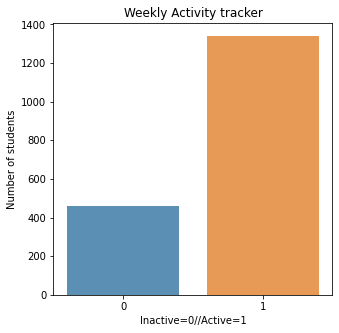

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
sns.barplot(stud_count.index, stud_count.values, alpha=0.8)
plt.title('Weekly Activity tracker')
# Set x-axis label
plt.xlabel('Inactive=0//Active=1')
# Set y-axis label
plt.ylabel('Number of students')

In [ ]:
BMI_count  = BFAB_BodyType['Healthy BMI'].value_counts()
BMI_count = BMI_count[:3,]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

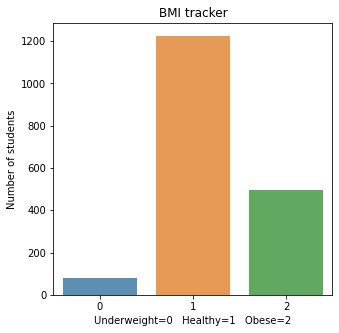

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(BMI_count.index, BMI_count.values, alpha=0.8)
plt.title('BMI tracker')
# Set x-axis label
plt.xlabel('Underweight=0   Healthy=1   Obese=2')
# Set y-axis label
plt.ylabel('Number of students')

In [ ]:
HH_count  = BFAB_BodyType['Healthy Heart'].value_counts()
HH_count = HH_count[:3,]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

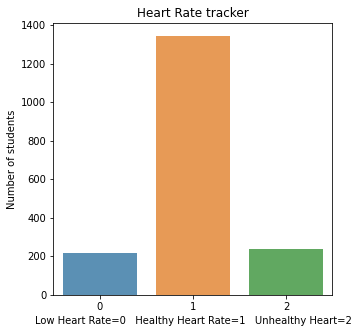

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(HH_count.index, HH_count.values, alpha=0.8)
plt.title('Heart Rate tracker')
# Set x-axis label
plt.xlabel('Low Heart Rate=0   Healthy Heart Rate=1   Unhealthy Heart=2')
# Set y-axis label
plt.ylabel('Number of students')

Class=VP, n=96 (5.330%)
Class=V, n=5 (0.278%)
Class=VK, n=151 (8.384%)
Class=P, n=697 (38.701%)
Class=KP, n=329 (18.268%)
Class=KV, n=99 (5.497%)
Class=PV, n=131 (7.274%)
Class=K, n=293 (16.269%)


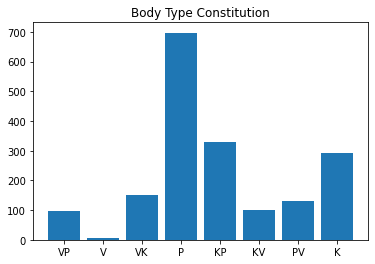

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
#url = '/content/drive/MyDrive/Body_Type.csv'
# load the csv file as a data frame

data = BFAB_BodyType.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
#y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.title('Body Type Constitution')
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


Class=VP, n=697 (12.500%)
Class=V, n=697 (12.500%)
Class=VK, n=697 (12.500%)
Class=P, n=697 (12.500%)
Class=KP, n=697 (12.500%)
Class=KV, n=697 (12.500%)
Class=PV, n=697 (12.500%)
Class=K, n=697 (12.500%)


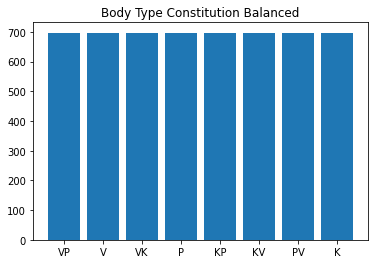

In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location

data = BFAB_BodyType.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
#y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.title('Body Type Constitution Balanced')
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
df = pd.DataFrame(X,columns =['BMI','Sex','Steps','THR','FatBurn','Cardio','Peak','Age','Active','Healthy BMI','Healthy Heart'])

In [ ]:
df_1 = pd.DataFrame(y,columns =['Body Type'])

In [ ]:
df_Oversampled = pd.merge(df, df_1, left_index=True, right_index=True)

In [ ]:
df_Oversampled.to_csv('CSV_Oversampled.csv')

In [ ]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [ ]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)
sig_pred = sig.predict(X_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  36.38
F1 (Polynomial Kernel):  33.69


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, poly_pred,average=None))
print(recall_score(y_test, poly_pred,average=None))

[0.41726619 0.3699187  0.         0.55555556 0.64383562 0.20168067
 0.61904762 0.07777778]
[0.46031746 0.57961783 0.         0.07407407 0.56287425 0.36090226
 0.7        0.10144928]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, poly_pred, average=None, labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV'])

(array([0.20168067, 0.55555556, 0.41726619, 0.07777778, 0.61904762,
        0.        , 0.3699187 , 0.64383562]),
 array([0.36090226, 0.07407407, 0.46031746, 0.10144928, 0.7       ,
        0.        , 0.57961783, 0.56287425]),
 array([0.25876011, 0.13071895, 0.43773585, 0.08805031, 0.65703971,
        0.        , 0.4516129 , 0.60063898]),
 array([133, 135, 126, 138, 130, 130, 157, 167]))

In [ ]:
labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV']

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  95.43
F1 (RBF Kernel):  95.59


In [ ]:
precision_recall_fscore_support(y_test, rbf_pred, average=None, labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV'])

(array([1.        , 0.72580645, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 0.86507937, 1.        , 1.        ,
        1.        , 0.8089172 , 0.9760479 ]),
 array([1.        , 0.8411215 , 0.92765957, 1.        , 1.        ,
        1.        , 0.8943662 , 0.98787879]),
 array([133, 135, 126, 138, 130, 130, 157, 167]))

In [ ]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Linear Kernel):  82.97
F1 (Linear Kernel):  82.57


In [ ]:
sig_accuracy = accuracy_score(y_test, sig_pred)
sig_f1 = f1_score(y_test, sig_pred, average='weighted')
print('Accuracy (sig Kernel): ', "%.2f" % (sig_accuracy*100))
print('F1 (sig Kernel): ', "%.2f" % (sig_f1*100))

Accuracy (sig Kernel):  6.72
F1 (sig Kernel):  3.40


In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
accuracy_DT = accuracy_score(y_test, dtree_predictions)
Snew_f1_score = f1_score(y_test, dtree_predictions, average='weighted')

In [ ]:
accuracy_DT

0.9874551971326165

In [ ]:
Snew_f1_score

0.987433650715478

In [ ]:
precision_recall_fscore_support(y_test, dtree_predictions, average=None, labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV'])

(array([0.9047619, 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       ]),
 array([1.        , 1.        , 1.        , 0.89855072, 1.        ,
        1.        , 1.        , 1.        ]),
 array([0.95      , 1.        , 1.        , 0.94656489, 1.        ,
        1.        , 1.        , 1.        ]),
 array([133, 135, 126, 138, 130, 130, 157, 167]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
precision_recall_fscore_support(y_test, y_pred_rf, average=None, labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV'])

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([133, 135, 126, 138, 130, 130, 157, 167]))

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print('Accuracy (RF): ', "%.2f" % (rf_accuracy*100))
print('F1 (RF): ', "%.2f" % (rf_f1*100))

Accuracy (RF):  100.00
F1 (RF):  100.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[126,   0,   0,   0,   0,   0,   0,   0],
       [  0, 157,   0,   0,   0,   0,   0,   0],
       [  0,   0, 130,   0,   0,   0,   0,   0],
       [  0,   0,   0, 135,   0,   0,   0,   0],
       [  0,   0,   0,   0, 167,   0,   0,   0],
       [  0,   0,   0,   0,   0, 133,   0,   0],
       [  0,   0,   0,   0,   0,   0, 130,   0],
       [  0,   0,   0,   0,   0,   0,   0, 138]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh_model = neigh.fit(X_train, y_train)
neigh_pred = neigh.predict(X_test)
accuracy_knn = accuracy_score(y_test, neigh_pred)
knn_f1_score = f1_score(y_test, neigh_pred, average='weighted')

In [ ]:
accuracy_knn

0.9453405017921147

In [ ]:
knn_f1_score

0.9438417847826767

In [ ]:
precision_recall_fscore_support(y_test, neigh_pred, average=None, labels=['V', 'P', 'K', 'VP', 'VK', 'KV', 'KP', 'PV'])

(array([0.98518519, 0.7654321 , 0.65      , 0.86075949, 0.89208633,
        0.96992481, 0.9858156 , 0.98816568]),
 array([1.        , 0.45925926, 0.82539683, 0.98550725, 0.95384615,
        0.99230769, 0.88535032, 1.        ]),
 array([0.99253731, 0.57407407, 0.72727273, 0.91891892, 0.92193309,
        0.98098859, 0.93288591, 0.99404762]),
 array([133, 135, 126, 138, 130, 130, 157, 167]))

Feature: 0, Score: 0.14323
Feature: 1, Score: 0.00287
Feature: 2, Score: 0.11192
Feature: 3, Score: 0.13725
Feature: 4, Score: 0.09928
Feature: 5, Score: 0.02023
Feature: 6, Score: 0.00717
Feature: 7, Score: 0.01060
Feature: 8, Score: 0.09358
Feature: 9, Score: 0.21875
Feature: 10, Score: 0.15512


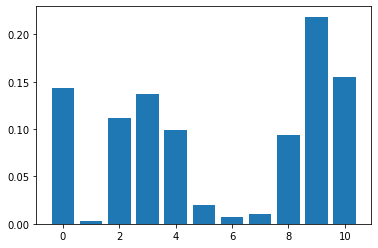

In [ ]:
importance = rf_classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
rf_classifier.feature_importances_

array([0.14323449, 0.00286994, 0.11191992, 0.13725125, 0.09927697,
       0.0202329 , 0.00717289, 0.01059731, 0.09358291, 0.21874556,
       0.15511587])

In [ ]:
f1_score

1.0

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

0.8064516129032258


In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.8620071684587813


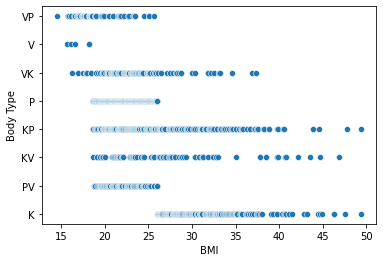

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

#creating sample data 
sample_data={'BMI':BFAB_BodyType['BMI'],
      'Body Type': BFAB_BodyType['Body Type']}
df= pd.DataFrame(sample_data)
sns.scatterplot(x="BMI", y="Body Type", data=df)

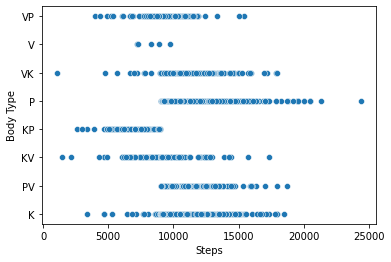

In [ ]:
#creating sample data 
sample_data={'Steps':BFAB_BodyType['Steps'],
      'Body Type': BFAB_BodyType['Body Type']}
df= pd.DataFrame(sample_data)
sns.scatterplot(x="Steps", y="Body Type", data=df)

(20.0, 30.0)

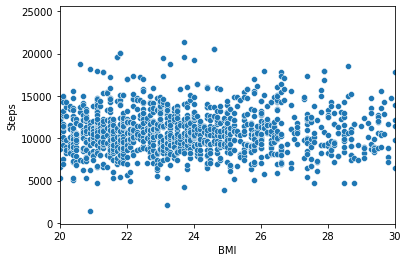

In [ ]:
line_sample_data = {'BMI':BFAB_BodyType['BMI'],
                    'Steps':BFAB_BodyType['Steps']}
df= pd.DataFrame(line_sample_data)                
   
plot2 = sns.scatterplot(x="BMI", y="Steps", data=df)
plot2.set_xlim(20,30)

(30.0, 50.0)

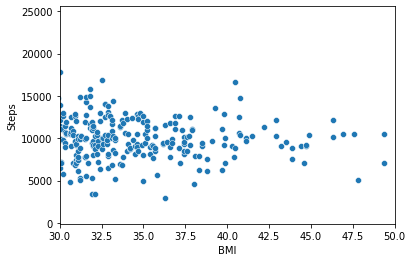

In [ ]:
line_sample_data = {'BMI':BFAB_BodyType['BMI'],
                    'Steps':BFAB_BodyType['Steps']}
df= pd.DataFrame(line_sample_data)                
   
plot2 = sns.scatterplot(x="BMI", y="Steps", data=df)
plot2.set_xlim(30,50)

(20.0, 30.0)

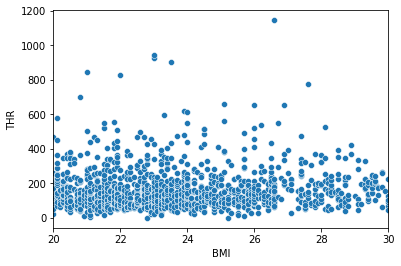

In [ ]:
line_sample_data = {'BMI':BFAB_BodyType['BMI'],
                    'THR':BFAB_BodyType['THR']}
df= pd.DataFrame(line_sample_data)                
   
plot2 = sns.scatterplot(x="BMI", y="THR", data=df)
plot2.set_xlim(20,30)

(30.0, 50.0)

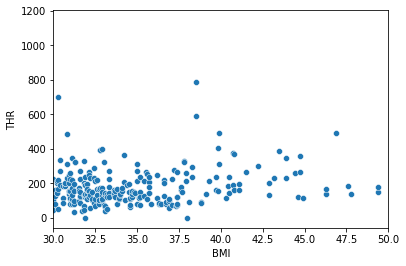

In [ ]:
line_sample_data = {'BMI':BFAB_BodyType['BMI'],
                    'THR':BFAB_BodyType['THR']}
df= pd.DataFrame(line_sample_data)                
   
plot2 = sns.scatterplot(x="BMI", y="THR", data=df)
plot2.set_xlim(30,50)

(30.0, 35.0)

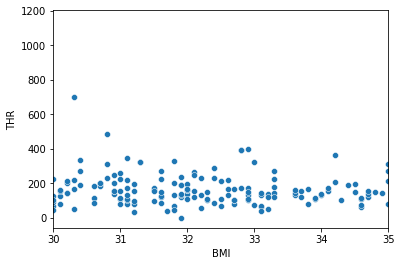

In [ ]:
line_sample_data = {'BMI':BFAB_BodyType['BMI'],
                    'THR':BFAB_BodyType['THR']}
df= pd.DataFrame(line_sample_data)                
   
plot2 = sns.scatterplot(x="BMI", y="THR", data=df)
plot2.set_xlim(30,35)

First sentence embedding technique:Doc2Vec

In [ ]:
word_soup_new = []
benefits_asanas = []
word_soup_new = asanas['Word_Soup_new'].to_list()
asanas['Benefits'] = asanas['Benefits'].apply(str)
benefits_asanas = asanas['Benefits'].to_list()

sentence_not_to_do = []
asanas['Contraindications'] = asanas['Contraindications'].apply(str)
sentence_not_to_do = asanas['Contraindications'].to_list()


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# import
tagged_data = []
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(word_soup_new)]
tagged_data

[TaggedDocument(words=['self', 'group', 'blood', 'pressure', 'excellent', 'asanas', 'useful', 'energy', 'awareness', 'rheumatism', 'heart', 'problems', 'ments', 'arthritis', 'exercise', 'body', 'blockages', 'confidence', 'high', 'coordination', 'physical', 'joints', 'vigorous'], tags=[0]),
 TaggedDocument(words=['self', 'group', 'blood', 'pressure', 'excellent', 'asanas', 'useful', 'energy', 'awareness', 'rheumatism', 'heart', 'problems', 'ments', 'arthritis', 'exercise', 'body', 'blockages', 'confidence', 'high', 'coordination', 'physical', 'joints', 'vigorous'], tags=[1]),
 TaggedDocument(words=['self', 'group', 'blood', 'pressure', 'excellent', 'asanas', 'useful', 'energy', 'awareness', 'rheumatism', 'heart', 'problems', 'ments', 'arthritis', 'exercise', 'body', 'blockages', 'confidence', 'high', 'coordination', 'physical', 'joints', 'vigorous'], tags=[2]),
 TaggedDocument(words=['stagnant', 'lymph', 'foot', 'blood', 'cramp', 'help', 'tiredness', 'post', 'bedridden', 'relieve', 'ope

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 50, window = 4, min_count = 1, epochs = 200)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

{'self': <gensim.models.keyedvectors.Vocab at 0x7f295e7502d0>,
 'group': <gensim.models.keyedvectors.Vocab at 0x7f295e750e10>,
 'blood': <gensim.models.keyedvectors.Vocab at 0x7f295e750b10>,
 'pressure': <gensim.models.keyedvectors.Vocab at 0x7f295e750dd0>,
 'excellent': <gensim.models.keyedvectors.Vocab at 0x7f295e750fd0>,
 'asanas': <gensim.models.keyedvectors.Vocab at 0x7f295e750410>,
 'useful': <gensim.models.keyedvectors.Vocab at 0x7f295e750650>,
 'energy': <gensim.models.keyedvectors.Vocab at 0x7f295e7507d0>,
 'awareness': <gensim.models.keyedvectors.Vocab at 0x7f295e750590>,
 'rheumatism': <gensim.models.keyedvectors.Vocab at 0x7f295e750d10>,
 'heart': <gensim.models.keyedvectors.Vocab at 0x7f295e750a90>,
 'problems': <gensim.models.keyedvectors.Vocab at 0x7f295e750890>,
 'ments': <gensim.models.keyedvectors.Vocab at 0x7f295e7501d0>,
 'arthritis': <gensim.models.keyedvectors.Vocab at 0x7f295e000710>,
 'exercise': <gensim.models.keyedvectors.Vocab at 0x7f295e000750>,
 'body': <ge

In [ ]:
test_doc = word_tokenize("I am facing back muscle pain and sciatica irritation and joint pain.".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

[(6, 0.668487012386322),
 (39, 0.5977280735969543),
 (41, 0.5407358407974243),
 (40, 0.5348901152610779),
 (102, 0.5178437829017639),
 (37, 0.5012862086296082),
 (15, 0.49706700444221497),
 (45, 0.4767443537712097),
 (14, 0.4594787359237671),
 (34, 0.45601198077201843)]

With Sentence Transformers

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 4.7 MB 33.4 MB/s 
     |████████████████████████████████| 1.3 MB 52.7 MB/s 
     |████████████████████████████████| 120 kB 43.2 MB/s 
     |████████████████████████████████| 6.6 MB 41.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=27f4a96d191942e557d2859adabcf9e80b57ffda2b4f0b269a249a9b0375c043
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = sbert_model.encode(benefits_asanas)

#print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

In [ ]:
query = "I am facing back muscle pain and sciatica irritation and joint pain."
query_vec = sbert_model.encode([query])[0]

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
res = []
for ind,sent in enumerate(benefits_asanas):
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  #print("Sentence = ", sent, "; similarity = ", sim)
  res.append((ind, sim))

In [ ]:
res_new = sorted(res)

In [ ]:
def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    return(sorted(tup, key = lambda x: x[1], reverse=True)) 

In [ ]:
Sort_Tuple(res)[0:10]

[(138, 0.63768995),
 (19, 0.6183747),
 (18, 0.61079365),
 (79, 0.60985583),
 (121, 0.60975206),
 (29, 0.6069901),
 (71, 0.60580957),
 (0, 0.59391373),
 (1, 0.59391373),
 (2, 0.59391373)]

3rd Technique

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
query = "I am facing back muscle pain and sciatica irritation and joint pain."
sentence_embeddings = model(benefits_asanas)
sentence_not_to_do_sentence_emb = model(sentence_not_to_do)
query_vec = model([query])[0]

In [ ]:
np.shape(query_vec)

TensorShape([512])

In [ ]:
len(model([query])[0])

512

In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [ ]:
res_new = []
for ind_new,sent_new in enumerate(benefits_asanas):
  sim_new = cosine(query_vec, model([sent_new])[0])
  #print("Sentence = ", sent, "; similarity = ", sim)
  res_new.append((ind_new, sim_new))

In [ ]:
res_new_not_to_do = []
for ind_new_nt, sent_new_nt in enumerate(sentence_not_to_do):
  sim_new_nt = cosine(query_vec, model([sent_new_nt])[0])
  res_new_not_to_do.append((ind_new_nt,sim_new_nt))

In [ ]:
len(sentence_embeddings)

226

In [ ]:
final_op = Sort_Tuple(res_new)[0:10]

In [ ]:
final_op_nt_to_do = Sort_Tuple(res_new_not_to_do)[0:10]

In [ ]:
for item_ in range(len(final_op)):

  print(asanas['AName'][final_op[item_][0]])

Meru Wakrasana (spinal twist)
Pada Sanchalanasana
Bhu Namanasana (spinal twist prostration pose)
VYAGHRASANA
Gomukhasana (cow's face pose)
DOLASANA
Jyestikasana (superior posture)
Utthita Janu Sirshasana (standing head between knees pose)
Vayu Nishkasana
Vishwamitrasana (Sage Vishwamitra's pose)


In [ ]:
for item_ in range(len(final_op_nt_to_do)):

  print(asanas['AName'][final_op_nt_to_do[item_][0]])

Pooma Titali Asana
Kashtha Takshanasana
Namaskarasana
Udarakarshanasana
Utthita Hasta Padangusthasana (raised hand to big toe
pose)
Pada Angushthasana (tiptoe pose)
Hasta Pada Angushthasana (finger to toe stretch)
TIRYAKA KATI CHAKRASANA
Ardha Padmasana (half lotus pose)
SUPTA VAJRASANA


In [ ]:
[(6, 0.7361676096916199),
 (45, 0.7340274453163147),
 (102, 0.6993881464004517),
 (12, 0.6352957487106323),
 (37, 0.5979675054550171),
 (43, 0.5633800029754639),
 (19, 0.5578968524932861),
 (114, 0.5376175045967102),
 (36, 0.5199707746505737),
 (128, 0.5176911950111389)]

[(6, 0.7361676096916199),
 (45, 0.7340274453163147),
 (102, 0.6993881464004517),
 (12, 0.6352957487106323),
 (37, 0.5979675054550171),
 (43, 0.5633800029754639),
 (19, 0.5578968524932861),
 (114, 0.5376175045967102),
 (36, 0.5199707746505737),
 (128, 0.5176911950111389)]

In [ ]:
[(138, 0.63768995),
 (19, 0.6183747),
 (18, 0.61079365),
 (79, 0.60985583),
 (121, 0.60975206),
 (29, 0.6069901),
 (71, 0.60580957),
 (0, 0.59391373),
 (1, 0.59391373),
 (2, 0.59391373)]

[(138, 0.63768995),
 (19, 0.6183747),
 (18, 0.61079365),
 (79, 0.60985583),
 (121, 0.60975206),
 (29, 0.6069901),
 (71, 0.60580957),
 (0, 0.59391373),
 (1, 0.59391373),
 (2, 0.59391373)]

In [ ]:
[(119, 0.5923804),
 (19, 0.52934337),
 (120, 0.51165956),
 (62, 0.49619046),
 (107, 0.48031884),
 (83, 0.46139434),
 (44, 0.4490634),
 (117, 0.44516063),
 (31, 0.42218882),
 (185, 0.4215759)]

[(119, 0.5923804),
 (19, 0.52934337),
 (120, 0.51165956),
 (62, 0.49619046),
 (107, 0.48031884),
 (83, 0.46139434),
 (44, 0.4490634),
 (117, 0.44516063),
 (31, 0.42218882),
 (185, 0.4215759)]

In [ ]:
benefits_asanas[107]

NameError: ignored

In [ ]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=b7b3b9db220d130a7b9cd2c4f53e279124cf9893f794ac8ae991764ed22b90ed
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [ ]:
asanas['Level'][119]

'Intermediate'